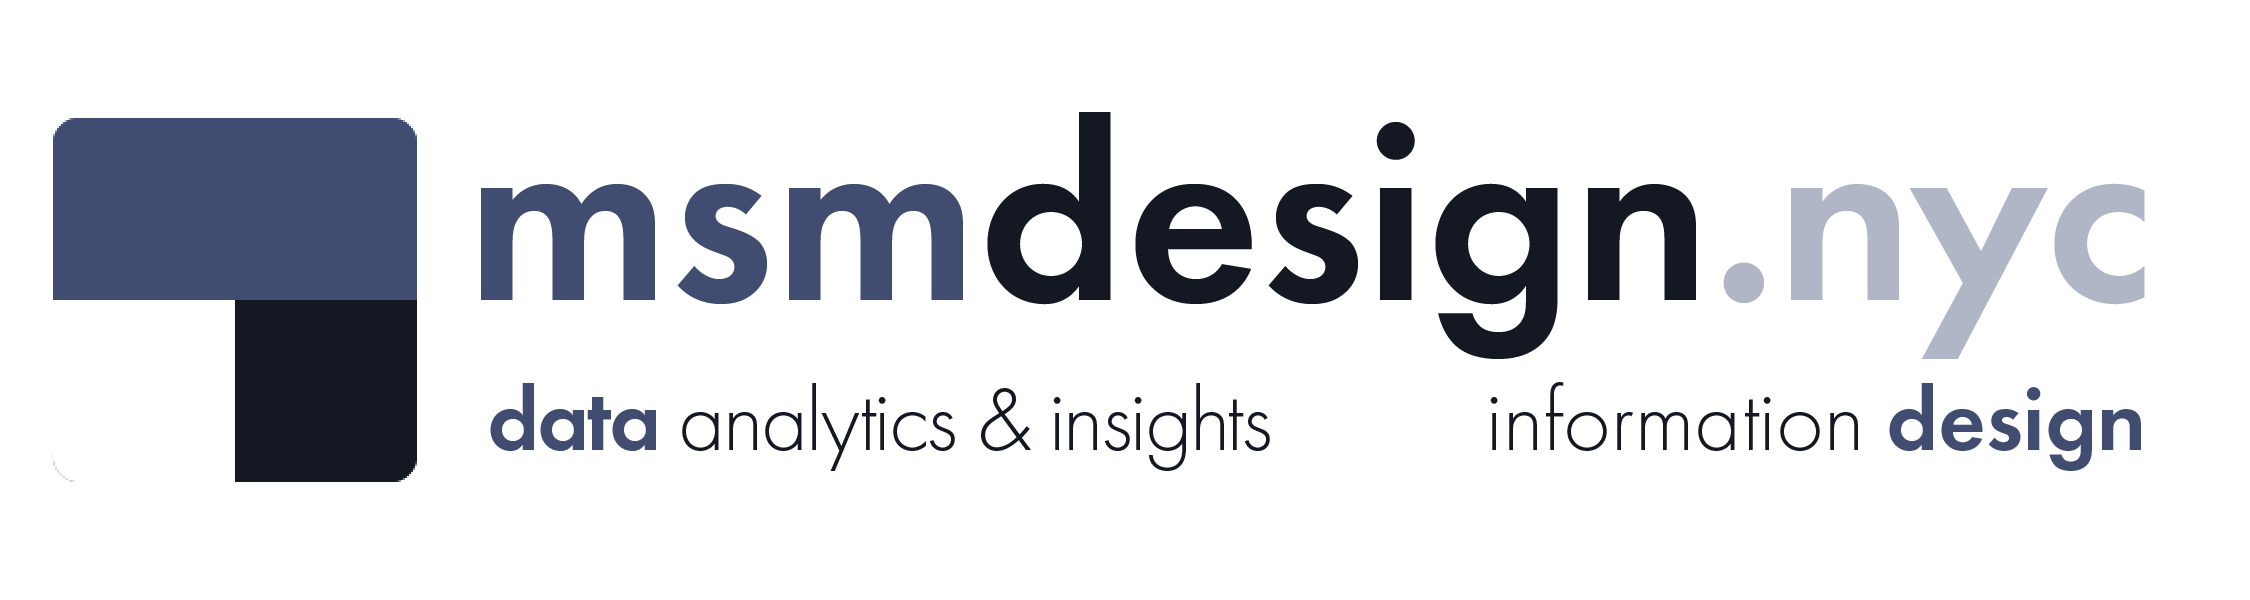

---
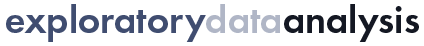

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


**Dataset Analyzed:** *Agency Voter Registration Activity*

**About This Dataset:** Section 1057-a of the New York City Charter requires certain agencies to engage in and report on voter registration activities. This dataset captures how many voter registration applications each agency has distributed, how many applications agency staff sent to the Board of Elections, how many staff each agency trained to distribute voter registration applications, whether or not the agency hosts a link to voting.nyc on its website and if so, how many clicks that link received during the reporting period. Data provided by Mayor's Office of Operations (OPS), the City of New York: https://data.cityofnewyork.us/City-Government/Agency-Voter-Registration-Activity/kkum-y97z



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** MSM-031


**EDA Publication Date:** Wednesday, November 3, 2021


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

## **0. Setup the workspace**

In [1]:
# import the libraries we'll need for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data stored in a csv file (hosted on GitHub) and assign it to a variable

agencies = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/DS-NYC-003-Agency_Voter_Registration_Activity.csv', encoding='utf-8')

In [3]:
# confirm that the data has loaded correctly by displaying the first few and the last few rows of the DataFrame

agencies.head()

,Agency,Beginning of Reporting Period,End of Reporting Period,People Served,Applications Distributed,Applications sent to BOE by Agency,Staff Trained,Agency Weblink to NYC Votes (Y/N),Web Clicks
0,Aging,07/01/2018,12/31/2018,NaN,96,33,500.0,Y,30
1,Business Integrity Commission,07/01/2018,12/31/2018,NaN,1,0,5.0,Y,6
2,Children's Services,07/01/2018,12/31/2018,NaN,3080,84,211.0,Y,812
3,City Planning,07/01/2018,12/31/2018,NaN,0,0,5.0,Y,22
4,Citywide Administrative Services,07/01/2018,12/31/2018,NaN,39,0,7.0,Y,319


In [4]:
agencies.tail(3)

,Agency,Beginning of Reporting Period,End of Reporting Period,People Served,Applications Distributed,Applications sent to BOE by Agency,Staff Trained,Agency Weblink to NYC Votes (Y/N),Web Clicks
285,Taxi and Limousine,07/01/2020,12/31/2020,"14,000",200,0,605.0,Y,78
286,Transportation,07/01/2020,12/31/2020,"9,274","8,725",NaN,0.0,Y,509
287,Youth and Community Development,07/01/2020,12/31/2020,"12,185","1,968",270,157.0,N,0


## **1. Wrap our heads around what is contained in the dataset**

In [5]:
# how many rows and how many columns are contained in our dataset?

agencies.shape

(288, 9)

In [6]:
# what is the index (set of row labels) for our dataset?

agencies.index

RangeIndex(start=0, stop=288, step=1)

In [7]:
# what are the columns of our dataset?

agencies.columns

Index(['Agency', 'Beginning of Reporting Period', 'End of Reporting Period',
       'People Served', 'Applications Distributed',
       'Applications sent to BOE by Agency', 'Staff Trained',
       'Agency Weblink to NYC Votes (Y/N)', 'Web Clicks'],
      dtype='object')

In [8]:
# what kind of data does each columns in our dataset hold?

agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agency                              288 non-null    object 
 1   Beginning of Reporting Period       288 non-null    object 
 2   End of Reporting Period             288 non-null    object 
 3   People Served                       204 non-null    object 
 4   Applications Distributed            250 non-null    object 
 5   Applications sent to BOE by Agency  254 non-null    object 
 6   Staff Trained                       252 non-null    float64
 7   Agency Weblink to NYC Votes (Y/N)   247 non-null    object 
 8   Web Clicks                          201 non-null    object 
dtypes: float64(1), object(8)
memory usage: 20.4+ KB


In [9]:
# change the data types of our columns so we can better analyze the data

agencies['Beginning of Reporting Period'] = pd.to_datetime(agencies['Beginning of Reporting Period'])

agencies['End of Reporting Period'] = pd.to_datetime(agencies['End of Reporting Period'])

agencies['People Served'] = pd.to_numeric(agencies['People Served'], errors='coerce')

agencies['Applications Distributed'] = pd.to_numeric(agencies['Applications Distributed'], errors='coerce')

agencies['Applications sent to BOE by Agency'] = pd.to_numeric(agencies['Applications sent to BOE by Agency'], errors='coerce')

agencies['Staff Trained'] = pd.to_numeric(agencies['Staff Trained'], errors='coerce')

agencies['Agency Weblink to NYC Votes (Y/N)'] = agencies['Agency Weblink to NYC Votes (Y/N)'].astype('category')

agencies['Web Clicks'] = pd.to_numeric(agencies['Web Clicks'], errors='coerce')

In [10]:
# confirm that the changes to our data types have been performed correctly

agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency                              288 non-null    object        
 1   Beginning of Reporting Period       288 non-null    datetime64[ns]
 2   End of Reporting Period             288 non-null    datetime64[ns]
 3   People Served                       192 non-null    float64       
 4   Applications Distributed            240 non-null    float64       
 5   Applications sent to BOE by Agency  253 non-null    float64       
 6   Staff Trained                       252 non-null    float64       
 7   Agency Weblink to NYC Votes (Y/N)   247 non-null    category      
 8   Web Clicks                          200 non-null    float64       
dtypes: category(1), datetime64[ns](2), float64(5), object(1)
memory usage: 18.5+ KB


In [11]:
# are there any missing (null) values in our dataset?

agencies.isna().sum()

Agency                                 0
Beginning of Reporting Period          0
End of Reporting Period                0
People Served                         96
Applications Distributed              48
Applications sent to BOE by Agency    35
Staff Trained                         36
Agency Weblink to NYC Votes (Y/N)     41
Web Clicks                            88
dtype: int64

In [12]:
# display summary statistics for the numerical variables contained in our dataset

agencies.describe(include=[np.number])

,People Served,Applications Distributed,Applications sent to BOE by Agency,Staff Trained,Web Clicks
count,1.920000e+02,2.400000e+02,253.000000,252.000000,200.000000
mean,1.698270e+05,2.780358e+04,371.185771,165.420635,623.445000
std,5.086276e+05,1.423889e+05,1660.374098,816.822693,3171.083979
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.945250e+03,3.000000e+01,0.000000,2.000000,14.500000
50%,2.006900e+04,7.275000e+02,1.000000,10.000000,49.500000
75%,4.437400e+04,8.899250e+03,43.000000,50.000000,149.000000
max,3.156318e+06,1.861198e+06,13222.000000,11993.000000,31000.000000


In [13]:
# display summary statistics for the categorical variables contained in our dataset

agencies.describe(include=['category'])

,Agency Weblink to NYC Votes (Y/N)
count,247
unique,2
top,Y
freq,225


In [14]:
# when is the earliest beginning reporting period in our dataset?

agencies['Beginning of Reporting Period'].min()

Timestamp('2015-01-01 00:00:00')

In [15]:
# when is the most recent beginning reporting period in our dataset?

agencies['Beginning of Reporting Period'].max()

Timestamp('2020-07-01 00:00:00')

In [16]:
# when is the earliest end of reporting period in our dataset?

agencies['End of Reporting Period'].min()

Timestamp('2015-06-30 00:00:00')

In [17]:
# when is the most recent end of reporting period in our dataset?

agencies['End of Reporting Period'].max()

Timestamp('2020-12-31 00:00:00')

**First impressions of our dataset:**

- The dataset is 6 columns wide and 100 rows long
- each row is a business
- The 'Beginning of Reporting Period' and 'End of Reporting Period' columns contain datetime information
- The dataset contains information from January 1, 1900 through February 2, 2000

- Our dataset's categorical variables are:

  - 'Agency Weblink to NYC Votes (Y/N)'
 

- Our dataset's numeric variables are:

  - 'People Served'
  - 'Applications Distributed'
  - 'Applications sent to BOE by Agency'
  - 'Staff Trained'
  - 'Web Clicks'


- These columns contain complete information:

  - 'Beginning of Reporting Period'
  - 'End of Reporting Period'


- These columns are missing at least some data:

  - 'People Served'
  - 'Applications Distributed'
  - 'Applications sent to BOE by Agency'
  - 'Staff Trained'
  - 'Agency Weblink to NYC Votes (Y/N)'
  - 'Web Clicks'

## **2. Identify and subset the data that's relevant to our research**

**Let's take a closer look at each of our dataset's variables:**
              
- People Served                         
- Applications Distributed              
- Applications sent to BOE by Agency    
- Staff Trained                            
- Web Clicks 

## **3. Summarize and describe the contents of the dataset**

In [18]:
# group the data fram by the totals for each agency

gb_agencies = agencies.groupby(['Agency']).sum()

In [74]:
print(gb_agencies.sum())

People Served                         32606788.0
Applications Distributed               6672859.0
Applications sent to BOE by Agency       93910.0
Staff Trained                            41686.0
Web Clicks                              124689.0
dtype: float64


In [31]:
# isolate the 'Applications Distributed' column

applications_distributed = gb_agencies['Applications Distributed']

In [65]:
# find the top ten agencies according to the total number of applications distrbuted

top_applications_distributed = applications_distributed.nlargest(10)

In [66]:
# sort the dataframe
top_applications_distributed = top_applications_distributed.sort_values(ascending=False)

print(top_applications_distributed)

Agency
Human Resources Administration     4690660.0
Parks and Recreation                604181.0
Youth and Community Development     353974.0
Consumer Affairs                    345463.0
Finance                             171020.0
Transportation                      106989.0
Taxi and Limousine                   97809.0
Environmental Protection             87442.0
Correction                           76394.0
Homeless Services                    47007.0
Name: Applications Distributed, dtype: float64


<AxesSubplot:title={'center':'Total Applications Distributed by Agency'}, ylabel='Agency'>

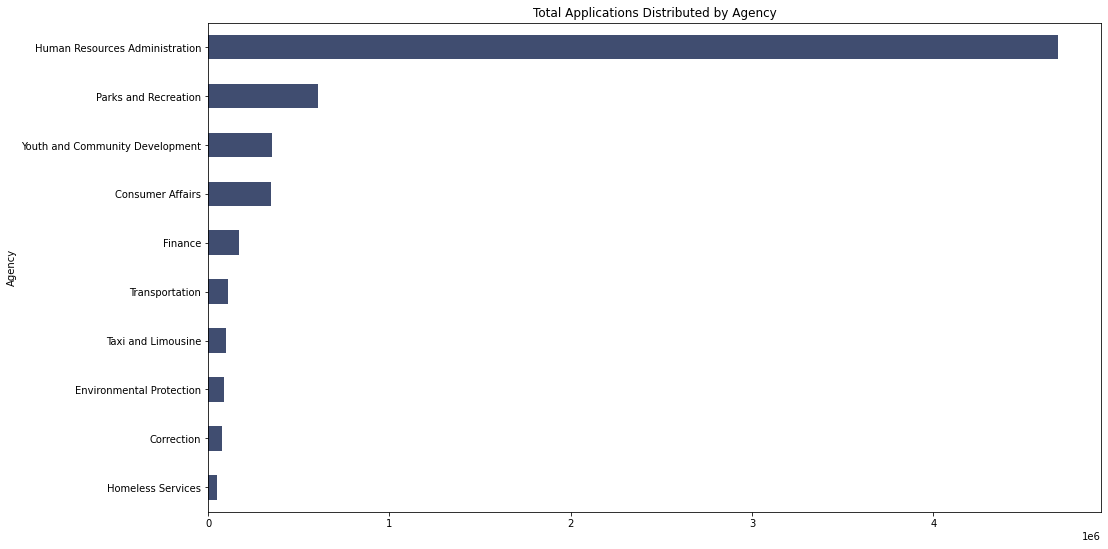

In [67]:
# visualize the top ten agencies according to the total number of applications distributed

# sort the dataframe
top_applications_distributed = top_applications_distributed.sort_values(ascending=True)

top_applications_distributed.plot(kind='barh', title='Total Applications Distributed by Agency', figsize=(16,9), color='#404d70')

In [25]:
# isolate the 'Applications sent to BOE by Agency' column

applications_sent = gb_agencies['Applications sent to BOE by Agency']

In [26]:
# find the top ten agencies according to the total number of applications sent to the Board of Elections

top_applications_sent = applications_sent.nlargest(10)

In [68]:
# sort the dataframe
top_applications_sent = top_applications_sent.sort_values(ascending=False)

print(top_applications_sent)

Agency
Human Resources Administration      69590.0
Youth and Community Development     12847.0
Correction                           3756.0
Civilian Complaint Review Board      2483.0
Citywide Administrative Services     1158.0
Homeless Services                     720.0
Environmental Protection              703.0
Small Business Services               622.0
Children's Services                   597.0
Aging                                 476.0
Name: Applications sent to BOE by Agency, dtype: float64


<AxesSubplot:title={'center':'Total Applications Sent to BoE by Agency'}, ylabel='Agency'>

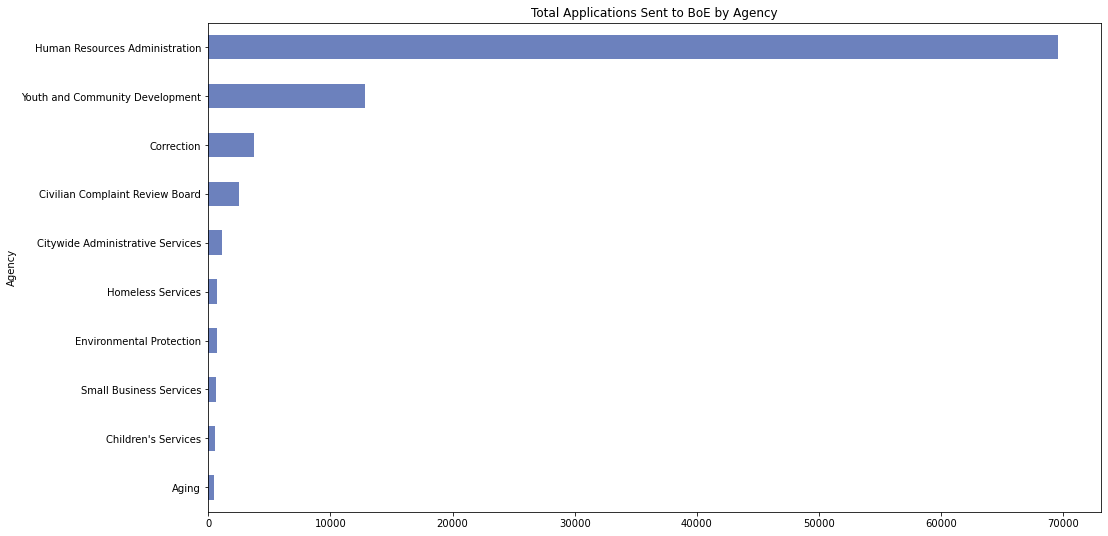

In [69]:
# visualize the top ten agencies according to the total number of applications sent to the Board of Elections

# sort the dataframe
top_applications_sent = top_applications_sent.sort_values(ascending=True)

top_applications_sent.plot(kind='barh', title='Total Applications Sent to BoE by Agency', figsize=(16,9), color='#6c81bd')

In [42]:
# isolate the 'Staff Trained' column

staff_trained = gb_agencies['Staff Trained']

In [43]:
# find the top ten agencies according to the total number of applications sent to the Board of Elections

top_staff_trained = staff_trained.nlargest(10)

In [70]:
# sort the dataframe
top_staff_trained = top_staff_trained.sort_values(ascending=False)

print(top_staff_trained)

Agency
Consumer Affairs                   12207.0
Children's Services                 7825.0
Human Resources Administration      7251.0
Aging                               5000.0
Taxi and Limousine                  3950.0
Youth and Community Development     2877.0
Small Business Services              515.0
Correction                           265.0
Transportation                       248.0
Parks and Recreation                 238.0
Name: Staff Trained, dtype: float64


<AxesSubplot:title={'center':'Total Staff Trained by Agency'}, ylabel='Agency'>

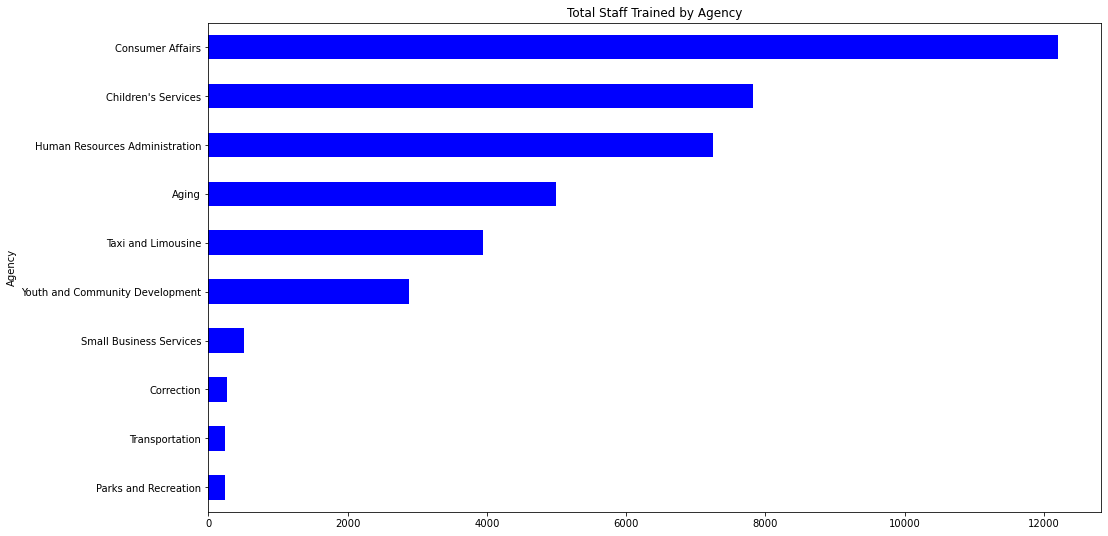

In [71]:
# visualize the top ten agencies according to the total number of staff trained

# sort the dataframe
top_staff_trained = top_staff_trained.sort_values(ascending=True)

top_staff_trained.plot(kind='barh', title='Total Staff Trained by Agency', figsize=(16,9), color='blue')

In [55]:
# isolate the 'Web Clicks' column

web_clicks = gb_agencies['Web Clicks']

In [56]:
# find the top ten agencies according to the total number of web clicks

top_web_clicks = web_clicks.nlargest(10)

In [72]:
# sort the dataframe
top_web_clicks = top_web_clicks.sort_values(ascending=False)

print(top_web_clicks)

Agency
Citywide Administrative Services        72401.0
Transportation                          13366.0
Finance                                 11631.0
Children's Services                      9215.0
Parks and Recreation                     5876.0
Taxi and Limousine                       2906.0
Probation                                2253.0
Housing Preservation and Development     1107.0
Consumer Affairs                         1084.0
Health and Mental Hygiene                 941.0
Name: Web Clicks, dtype: float64


<AxesSubplot:title={'center':'Total Web Clicks by Agency'}, ylabel='Agency'>

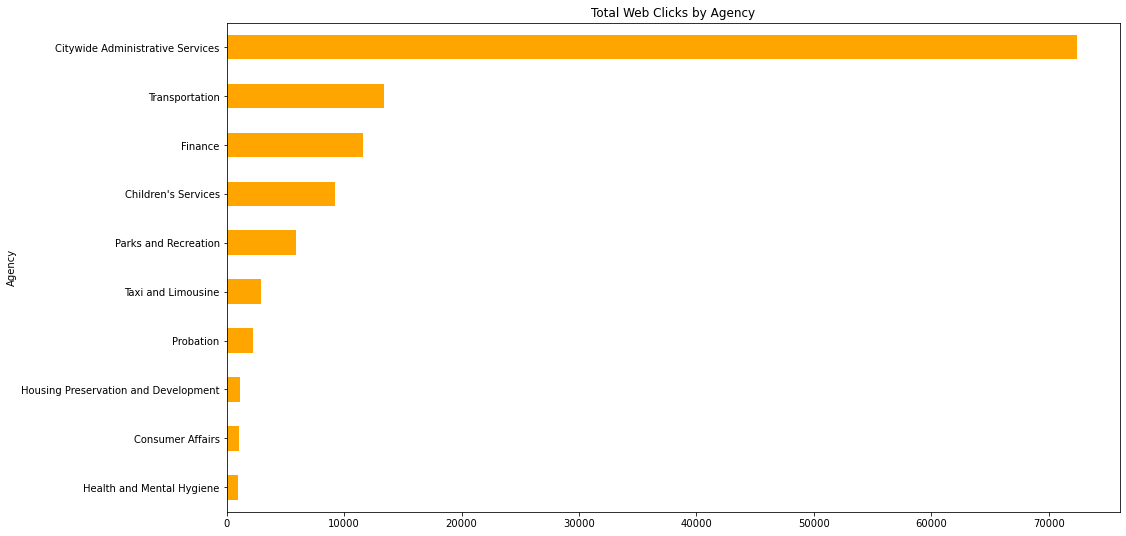

In [73]:
# visualize the top ten agencies according to the total number of web clicks

# sort the dataframe
top_web_clicks = top_web_clicks.sort_values(ascending=True)

top_web_clicks.plot(kind='barh', title='Total Web Clicks by Agency', figsize=(16,9), color='orange')

## **4. Final takeaways** 

Between January 2015 and January 2020:

- NYC agencies distributed a total of 6,672,859 voter registration applications. (The Human Resources Administration distributed more applications than any other agency with a total of 4,690,600 applications distributed.)


- NYC agencies sent a total of 93,910 completed voter registration applications to the Board of Elections. (The Human Resources Administrations sent more completed applications than any other agency with a total of 93,910 completed applications sent to the Board of Elections.)


- NYC agencies trained a total of 41,686 members of their staff on how to distribute voter registration applications. (Consumer Affairs trained more staff than any other agency with a total of 12,207 staff members trained.)


- NYC agency websites received a total of 124,689 clickthroughs to the voting.nyc website. (Citywide Administration Services received the most clickthroughs with a total of 72,401.)

## **Questions for Futher Investigation:**

- What were the totals during each year of the reporting period?


- What were the totals for each month of the reporting period?


- Did an increase or decrease in voter registration activities coincide with local election years? National election years?


- Did some agencies fall outside of the overall trends?

***